***Data Source2: [Yelp](https://www.yelp.com/developers/documentation/v3/get_started) API***

***Data Source3:  [CityBikes](https://citybik.es/) API***

In [67]:
#imports
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
final_data=pd.read_csv("../data/final_data.csv")
final_data.head()

,id,alias,name,review_count,rating,station,category_alias,category_title,station_id,latitude,longitude,no_of_bikes,network_id
0,o0AHPpZqqWc8jszVVNbooA,au-chien-chic-calais,Au Chien Chic,1.0,5.0,a,restaurants,Restaurants,116978dc6ed165d95a1ce386466bf165,50.946176,1.891176,0,vel-in
1,o0AHPpZqqWc8jszVVNbooA,au-chien-chic-calais,Au Chien Chic,1.0,5.0,a,beautysvc,Beauty & Spas,116978dc6ed165d95a1ce386466bf165,50.946176,1.891176,0,vel-in
2,WU6IaRGdEkYOm6r3QZOuUw,l-absinthe-calais-2,L'Absinthe,2.0,4.0,a,bars,Bars,116978dc6ed165d95a1ce386466bf165,50.946176,1.891176,0,vel-in
3,WU6IaRGdEkYOm6r3QZOuUw,l-absinthe-calais-2,L'Absinthe,2.0,4.0,a,danceclubs,Dance Clubs,116978dc6ed165d95a1ce386466bf165,50.946176,1.891176,0,vel-in
4,8sdlNaz1z5PosLyL8qPMIA,campanile-calais,Campanile,1.0,2.0,a,french,French,116978dc6ed165d95a1ce386466bf165,50.946176,1.891176,0,vel-in


***Build a regression model.***

***Assumptions :***
- Choose numerical fields from the dataset like review_count, rating, no_of_bikes
- Categorical fields category_alias or category_title 

***Note:*** Finding the relation between no of bikes and rating

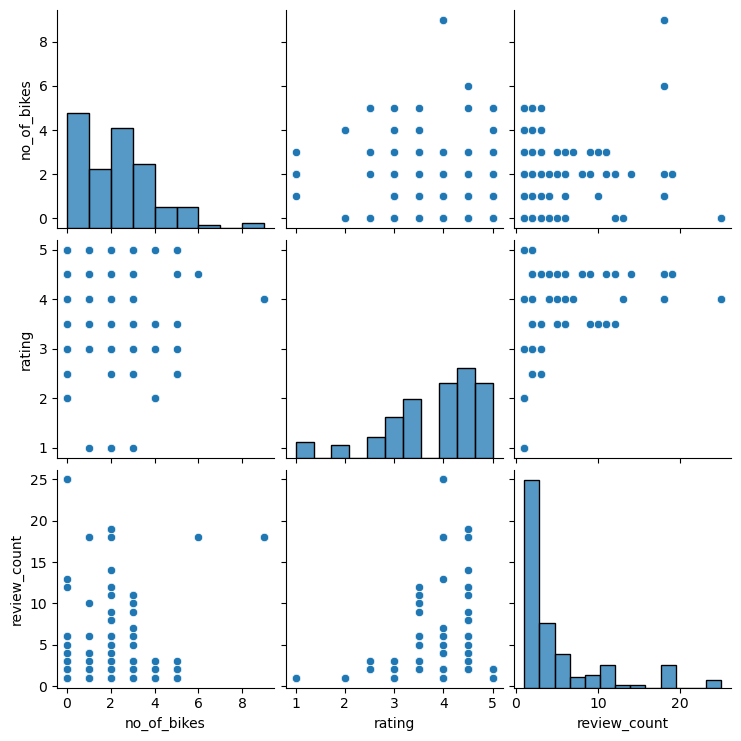

In [15]:
data_slice=final_data[['no_of_bikes','rating','review_count']].copy()
sns.pairplot(data_slice)

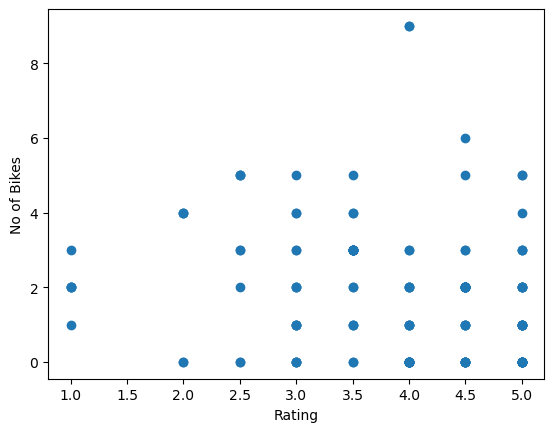

In [16]:
plt.scatter(data_slice['rating'],data_slice['no_of_bikes'])
plt.xlabel('Rating')
plt.ylabel('No of Bikes')
plt.show()

***Note:*** The above graph clearly shows that the relation between dependant variable and independent variable is non-linear

In [17]:
data_slice.corr()

,no_of_bikes,rating,review_count
no_of_bikes,1.000000,-0.174708,0.156515
rating,-0.174708,1.000000,0.136381
review_count,0.156515,0.136381,1.000000


***Note:*** Above values shows a poor correlation as all the values are too close to 0

In [21]:
stat, p1 = scipy.stats.pearsonr(data_slice['no_of_bikes'], data_slice['rating'])
stat, p2 = scipy.stats.pearsonr(data_slice['no_of_bikes'], data_slice['review_count'])
stat, p3 = scipy.stats.pearsonr(data_slice['rating'], data_slice['review_count'])
print(p1, p2, p3)

0.03191029622769848 0.054964479331345406 0.09496752543038503


***Note:*** Using Pearson's cofficient test the only one p-value is <0.05 so the other two will follow H-Null Hypothesis.p1 shows some significance in correlation between ***no_of_bikes*** and ***rating***
- Lets run a Regression Model to find tha more in-sites

In [22]:
y=final_data['no_of_bikes']
X=final_data[['rating','review_count']]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            no_of_bikes   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     5.031
Date:                Sun, 24 Sep 2023   Prob (F-statistic):            0.00769
Time:                        20:12:27   Log-Likelihood:                -290.05
No. Observations:                 151   AIC:                             586.1
Df Residuals:                     148   BIC:                             595.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8600      0.547      5.224   

***Note:*** Interpret the results

In [23]:
model.params

const           2.860005
rating         -0.343791
review_count    0.056740
dtype: float64

- The constant terms is the intercept of the regression line.which tells the noise present in model.
- The coefficient term tells the change in y for a unit change in X
- p-values for both the independent variables are small so we can reject null hypothesis
- but the biggest flaw in this model is very low values of R-squared and Adj.R-squared.That means we need to drop insignificant variables

***Note:*** lets try another regression

In [26]:
y=final_data['no_of_bikes']
X=final_data[['rating']]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            no_of_bikes   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.691
Date:                Sun, 24 Sep 2023   Prob (F-statistic):             0.0319
Time:                        20:39:55   Log-Likelihood:                -292.67
No. Observations:                 151   AIC:                             589.3
Df Residuals:                     149   BIC:                             595.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9622      0.553      5.353      0.0

***Note:*** we can clearly see that by ommiting review_count the model become worst with poor R-square

***Note:*** Let's try with sqrt(y)

In [30]:
y=np.sqrt(final_data['no_of_bikes'])
X=final_data[['rating']]
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            no_of_bikes   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4.862
Date:                Sun, 24 Sep 2023   Prob (F-statistic):             0.0290
Time:                        20:44:18   Log-Likelihood:                -176.31
No. Observations:                 151   AIC:                             356.6
Df Residuals:                     149   BIC:                             362.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6316      0.256      6.372      0.0

***Note:*** Still the same type of result

***Provide model output and an interpretation of the results.***

***Result:*** As we have tried various approches but the above model and the corresponding variables could not reveal significant results.

# Stretch

How can you turn the regression model into a classification model?

***Assumptions:***
- for the classification regression we choose the dependent variable as 'category_title'
- map the category

In [48]:
data_slice1=final_data[['category_title','rating','review_count','no_of_bikes']].copy()
data_slice1.head()

,category_title,rating,review_count,no_of_bikes
0,Restaurants,5.0,1.0,0
1,Beauty & Spas,5.0,1.0,0
2,Bars,4.0,2.0,0
3,Dance Clubs,4.0,2.0,0
4,French,2.0,1.0,0


In [38]:
unique_cat=data_slice1['category_title'].unique()
unique_cat

array(['Restaurants', 'Beauty & Spas', 'Bars', 'Dance Clubs', 'French',
       'Hotels', 'Fast Food', 'Seafood',
       'Landmarks & Historical Buildings', 'Bistros', 'Brasseries',
       'Food Delivery Services', 'Italian', 'Pizza', 'Japanese',
       'Pan Asian', 'Bakeries', 'Performing Arts', 'Cultural Center',
       'Thai', 'Creperies', 'Pubs', 'Wine Bars', 'Salad', 'Beaches',
       'Sandwiches', 'Buffets', 'Wok', 'Shoe Stores', 'Jewelry',
       'Car Rental', 'Steakhouses', 'Chicken Shop', 'Burgers', 'Desserts',
       'Vegetarian', 'Moroccan', 'Music Venues', 'American (Traditional)',
       'Cafes', 'Breakfast & Brunch', 'Chinese', 'Casinos', 'Barbeque'],
      dtype=object)

In [41]:
unique_cat1=dict(enumerate(unique_cat.flatten(), 1))
unique_cat1

{1: 'Restaurants',
 2: 'Beauty & Spas',
 3: 'Bars',
 4: 'Dance Clubs',
 5: 'French',
 6: 'Hotels',
 7: 'Fast Food',
 8: 'Seafood',
 9: 'Landmarks & Historical Buildings',
 10: 'Bistros',
 11: 'Brasseries',
 12: 'Food Delivery Services',
 13: 'Italian',
 14: 'Pizza',
 15: 'Japanese',
 16: 'Pan Asian',
 17: 'Bakeries',
 18: 'Performing Arts',
 19: 'Cultural Center',
 20: 'Thai',
 21: 'Creperies',
 22: 'Pubs',
 23: 'Wine Bars',
 24: 'Salad',
 25: 'Beaches',
 26: 'Sandwiches',
 27: 'Buffets',
 28: 'Wok',
 29: 'Shoe Stores',
 30: 'Jewelry',
 31: 'Car Rental',
 32: 'Steakhouses',
 33: 'Chicken Shop',
 34: 'Burgers',
 35: 'Desserts',
 36: 'Vegetarian',
 37: 'Moroccan',
 38: 'Music Venues',
 39: 'American (Traditional)',
 40: 'Cafes',
 41: 'Breakfast & Brunch',
 42: 'Chinese',
 43: 'Casinos',
 44: 'Barbeque'}

In [43]:
swapped_dict = {value: key for key, value in unique_cat1.items()}
swapped_dict

{'Restaurants': 1,
 'Beauty & Spas': 2,
 'Bars': 3,
 'Dance Clubs': 4,
 'French': 5,
 'Hotels': 6,
 'Fast Food': 7,
 'Seafood': 8,
 'Landmarks & Historical Buildings': 9,
 'Bistros': 10,
 'Brasseries': 11,
 'Food Delivery Services': 12,
 'Italian': 13,
 'Pizza': 14,
 'Japanese': 15,
 'Pan Asian': 16,
 'Bakeries': 17,
 'Performing Arts': 18,
 'Cultural Center': 19,
 'Thai': 20,
 'Creperies': 21,
 'Pubs': 22,
 'Wine Bars': 23,
 'Salad': 24,
 'Beaches': 25,
 'Sandwiches': 26,
 'Buffets': 27,
 'Wok': 28,
 'Shoe Stores': 29,
 'Jewelry': 30,
 'Car Rental': 31,
 'Steakhouses': 32,
 'Chicken Shop': 33,
 'Burgers': 34,
 'Desserts': 35,
 'Vegetarian': 36,
 'Moroccan': 37,
 'Music Venues': 38,
 'American (Traditional)': 39,
 'Cafes': 40,
 'Breakfast & Brunch': 41,
 'Chinese': 42,
 'Casinos': 43,
 'Barbeque': 44}

In [52]:
data_slice1['category_code'] = data_slice1['category_title'].map(swapped_dict)
data_slice1 = data_slice1.reindex()
data_slice1.head(10)

,category_title,rating,review_count,no_of_bikes,category_code
0,Restaurants,5.0,1.0,0,1
1,Beauty & Spas,5.0,1.0,0,2
2,Bars,4.0,2.0,0,3
3,Dance Clubs,4.0,2.0,0,4
4,French,2.0,1.0,0,5
5,Hotels,2.0,1.0,0,6
6,Fast Food,3.5,5.0,0,7
7,French,5.0,2.0,0,5
8,Seafood,5.0,2.0,0,8
9,Landmarks & Historical Buildings,4.5,3.0,0,9


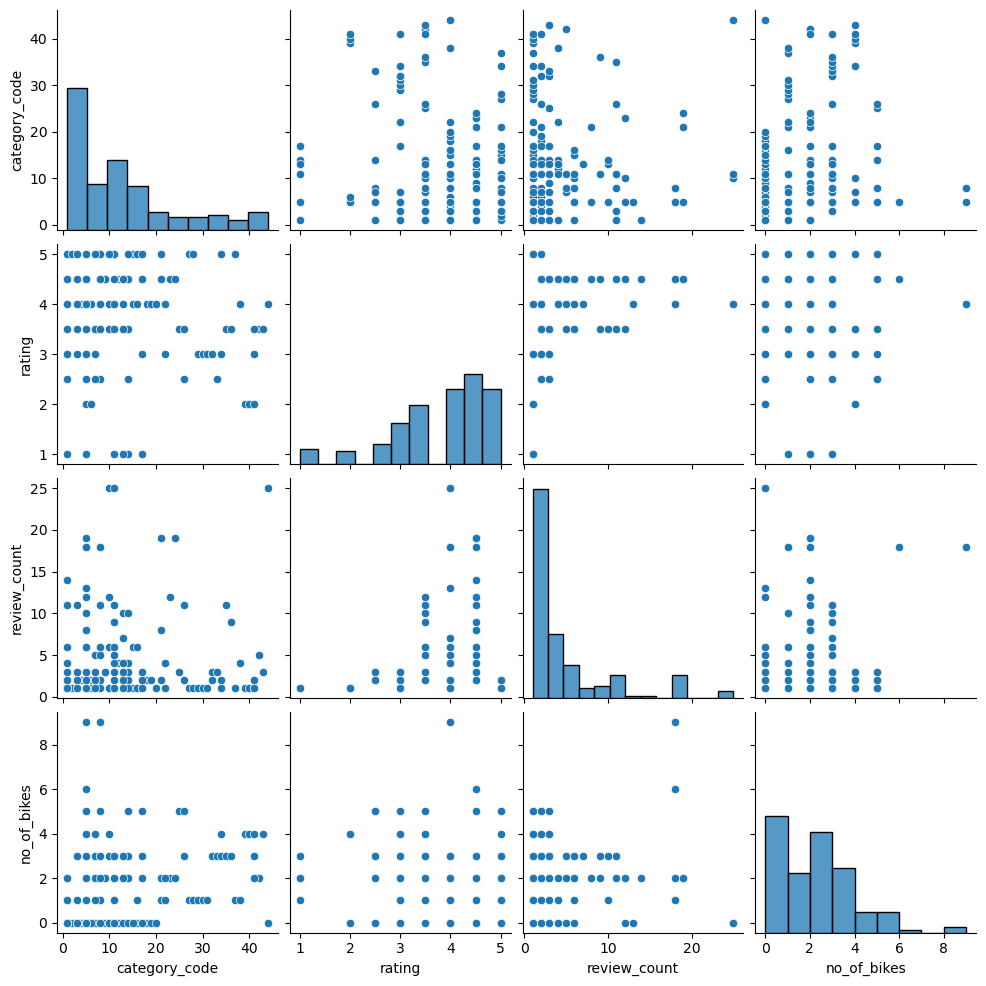

In [53]:
sns.pairplot(data_slice1[['category_code','rating','review_count','no_of_bikes']])


***Note:*** Lets start classification Model
- Take category_code as dependent and rating,review_count,no_of_bikes as independent

In [77]:
y = data_slice1['category_code']
X = data_slice1[['rating','review_count']]
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, shuffle=True) 

In [78]:
#Data was splitted as 80% train data and 20% test data.
 
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
 
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (120, 2)
X_test shape: (31, 2)
y_train shape: (120, 1)
y_test shape: (31, 1)


In [100]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [101]:
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))

Train Score: 0.13333333333333333
Test Score: 0.22580645161290322


B:\monika\datascience\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
B:\monika\datascience\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
B:\monika\datascience\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
B:\monika\datascience\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
B:\monika\datascience\l


***Note:*** The accuracy score gives the accuracy of the model prediction which comes out to be very low i.e 22% in this case.So this model lacks some more significance.
- One reason could be the sample size is small that means it lacks the sufficient amount of data to make model and predictions.